**Exercise 6: Polynomial Feature Expansion**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 06_exercise_poly_expansion.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/06_exercise_poly_expansion.ipynb
```

In this exercise, we will optimize a linear with polynomial feature expansion.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your training and testing scores.

```
Report training and validation/testing scores here.

```

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [43]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import sklearn.preprocessing as skpreprocess
from sklearn.linear_model import LinearRegression as LinearRegressionSciKit
import warnings, time
from matplotlib import pyplot as plt

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Helper function for plotting

In [44]:
def plot_results(axis,
                 x_values,
                 y_values,
                 labels,
                 colors,
                 x_limits,
                 y_limits,
                 x_label,
                 y_label):
    '''
    Plots x and y values using line plot with labels and colors

    Args:
        axis :  pyplot.ax
            matplotlib subplot axis
        x_values : list[numpy[float32]]
            list of numpy array of x values
        y_values : list[numpy[float32]]
            list of numpy array of y values
        labels : str
            list of names for legend
        colors : str
            colors for each line
        x_limits : list[float32]
            min and max values of x axis
        y_limits : list[float32]
            min and max values of y axis
        x_label : list[str]
            name of x axis
        y_label : list[str]
            name of y axis
    '''

    # TODO: Iterate through x_values, y_values, labels, and colors and plot them
    # with associated legend
    for x_value, y_value, label, color in zip(x_values, y_values, labels, colors):
        axis.plot(x_value, y_value, color=color, label=label, marker='o')

    

    # TODO: Set x and y limits
    axis.set_xlim(x_limits)
    axis.set_ylim(y_limits)

    # TODO: Set x and y labels
    axis.set_xlabel(x_label)
    axis.set_ylabel(y_label)
    
    axis.legend()


Load dataset

In [45]:
# Create synthetic dataset
X, y = skdata.make_friedman1(n_samples=5000, n_features=10, noise=5)

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(X.shape[0])

# Choose the first 80% as training set and the rest as testing
train_split_idx = int(0.80 * X.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
test_indices = shuffled_indices[train_split_idx:]

# Select the examples from x and y to construct our training and testing sets
X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]


Experiment 1: Demonstrate that linear regression will overfit if we use high degrees of polynomial expansion

Results for linear regression model with degree 1 polynomial expansion
Training set mean squared error: 30.9291
Testing set mean squared error: 31.9312
Results for linear regression model with degree 2 polynomial expansion
Training set mean squared error: 26.5915
Testing set mean squared error: 27.8807
Results for linear regression model with degree 3 polynomial expansion
Training set mean squared error: 23.5703
Testing set mean squared error: 27.0259
Results for linear regression model with degree 4 polynomial expansion
Training set mean squared error: 18.7832
Testing set mean squared error: 35.0734
Results for linear regression model with degree 5 polynomial expansion
Training set mean squared error: 6.0599
Testing set mean squared error: 214.1294


Text(0.5, 1.0, 'Training Time with Various Degrees of Polynomial Expansions')

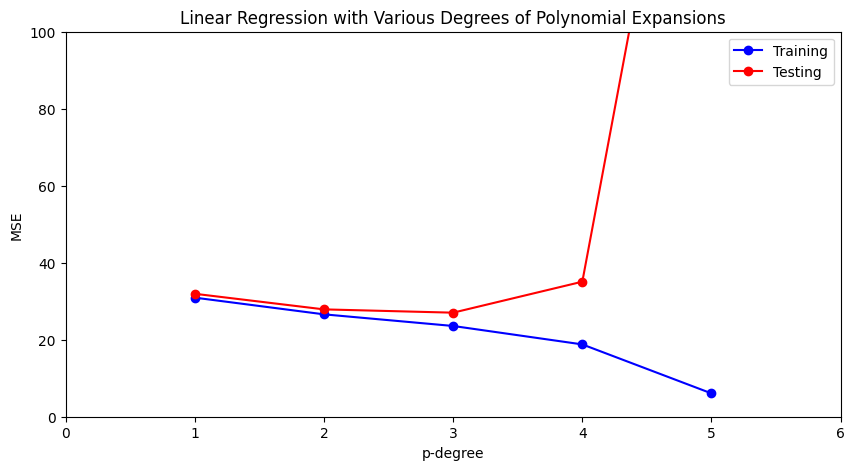

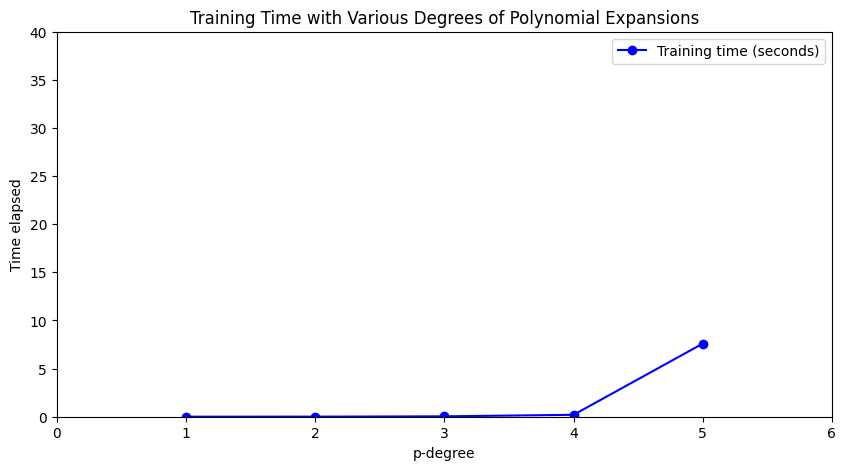

In [46]:
# TODO: Initialize a list containing 1 to 5 as the degrees for polynomial expansion
degrees = [1, 2, 3, 4, 5]

# Initialize empty lists to store scores for MSE
scores_mse_linear_poly_train = []
scores_mse_linear_poly_test = []

# Intialize empty list to store time elapsed
training_times_elapsed = []

for degree in degrees:

    time_start = time.time()

    # TODO: Initialize polynomial expansion
    poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

    # TODO: Compute the polynomial terms needed for the data

    # TODO: Transform the data by nonlinear mapping
    X_poly_train = poly_transform.fit_transform(X_train)
    X_poly_test = poly_transform.transform(X_test)

    # TODO: Initialize sci-kit linear regression model
    model_linear_poly = LinearRegressionSciKit()

    # TODO: Train linear regression model
    
    model_linear_poly.fit(X_poly_train, y_train)


    # TODO: Store time elapsed
    time_elapsed = time.time() - time_start
    training_times_elapsed.append(time_elapsed)
    print('Results for linear regression model with degree {} polynomial expansion'.format(degree))

    # TODO: Test model on training set
    predictions_train = model_linear_poly.predict(X_poly_train)
    score_mse_linear_poly_train = skmetrics.mean_squared_error(y_train, predictions_train)
    print('Training set mean squared error: {:.4f}'.format(score_mse_linear_poly_train))

    # TODO: Save MSE training scores
    scores_mse_linear_poly_train.append(score_mse_linear_poly_train)


    # TODO: Test model on testing set
    predictions_test = model_linear_poly.predict(X_poly_test)
    score_mse_linear_poly_test = skmetrics.mean_squared_error(y_test, predictions_test)
    print('Testing set mean squared error: {:.4f}'.format(score_mse_linear_poly_test))

    # TODO: Save MSE testing scores
    scores_mse_linear_poly_test.append(score_mse_linear_poly_test)



# Convert each scores to NumPy arrays
scores_mse_linear_poly_train = np.array(scores_mse_linear_poly_train)
scores_mse_linear_poly_test = np.array(scores_mse_linear_poly_test)

# Create figure for training and testing scores for different features
n_experiments = scores_mse_linear_poly_train.shape[0]

labels = ['Training', 'Testing']
colors = ['blue', 'red']

# TODO: Create a subplot of a 1 by 1 figure to plot MSE for training and testing
fig_scores = plt.figure(figsize=(10, 5))
ax_scores = fig_scores.add_subplot(1,1,1)

# TODO: Set x axis as list of list of polynomial degrees
experiments = [degrees, degrees]
# TODO: Set y axis as a list of list of scores for training and testing
scores = [scores_mse_linear_poly_train, scores_mse_linear_poly_test]

# TODO: Plot MSE scores for training and testing sets
# Set labels to ['Training', 'Testing'] and colors based on colors defined above
# Set x limits to 0 to number of experiments + 1 and y limits between 0 and 100
# Set x label to 'p-degree' and y label to 'MSE',

plot_results(ax_scores,
             experiments,
             scores,
             labels,
             colors,
             [0, n_experiments + 1],
             [0, 100],
             'p-degree',
             'MSE')
# TODO: Create plot title of 'Linear Regression with Various Degrees of Polynomial Expansions'

ax_scores.set_title('Linear Regression with Various Degrees of Polynomial Expansions')
# TODO: Create a subplot of a 1 by 1 figure to plot training times
fig_times = plt.figure(figsize=(10, 5))
ax_times = fig_times.add_subplot(1,1,1)

# TODO: Plot training time
# Wrap degrees and training_times_elapsed as lists and pass them in as x and y values
# Set labels to ['Training time (seconds)'] and colors based on colors defined above
# Set x limits to 0 to number of experiments + 1 and y limits between 0 and 40
# Set x label to 'p-degree' and y label to 'Time elapsed'
plot_results(ax_times,
             experiments,
             [training_times_elapsed],
             ['Training time (seconds)'],
             colors,
             [0, n_experiments + 1],
             [0, 40],
             'p-degree',
             'Time elapsed')
# TODO: Create plot title of 'Training Time with Various Degrees of Polynomial Expansions'
ax_times.set_title('Training Time with Various Degrees of Polynomial Expansions')